In [1]:
%pip install matplotlib-venn

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib_venn import venn2

Note: you may need to restart the kernel to use updated packages.


In [2]:

# Load datasets
hypothyroid_df = pd.read_csv('../data/processed/hypothyroid_condition.csv', sep='\t')
hyperthyroid_df = pd.read_csv('../data/processed/hyperthyroid_condition.csv', sep='\t')


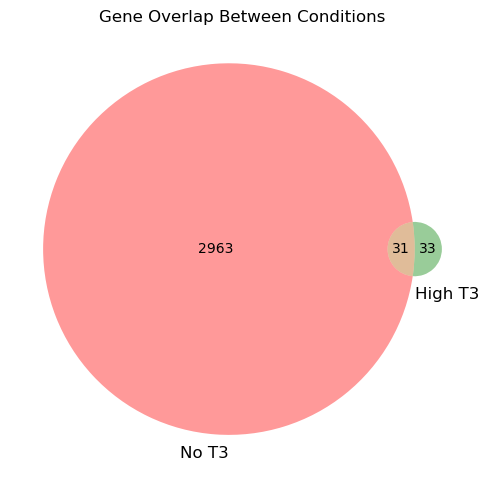

Analysis complete: Volcano plots and Venn diagram saved.


In [3]:

# Venn Diagram using only significant genes
hypo_genes = set(hypothyroid_df[hypothyroid_df['Significance'] == 1]['GeneSymbol'])
hyper_genes = set(hyperthyroid_df[hyperthyroid_df['Significance'] == 1]['GeneSymbol'])

plt.figure(figsize=(6, 6))
venn2([hypo_genes, hyper_genes], ('No T3', 'High T3'))
plt.title('Gene Overlap Between Conditions')
plt.savefig('../figures/main/venn_diagram.png')
plt.show()

print("Analysis complete: Volcano plots and Venn diagram saved.")


In [4]:
# Create top DEGs table
def create_top_degs_table(df, condition):
    top_high = df.nlargest(5, 'log2FC')[['GeneSymbol', 'Gene ID (Biomart)', 'log2FC']]
    top_low = df.nsmallest(5, 'log2FC')[['GeneSymbol', 'Gene ID (Biomart)', 'log2FC']]
    
    top_high['Direction'] = 'Upregulated'
    top_low['Direction'] = 'Downregulated'
    
    return pd.concat([top_high, top_low]).reset_index(drop=True)

hypothyroid_top_degs = create_top_degs_table(hypothyroid_df, 'Hypothyroid')
hyperthyroid_top_degs = create_top_degs_table(hyperthyroid_df, 'Hyperthyroid')


In [5]:

# Display tables
display(hypothyroid_top_degs)
display(hyperthyroid_top_degs)

,GeneSymbol,Gene ID (Biomart),log2FC,Direction
0,NPPC,4880,1.356529,Upregulated
1,RARRES2,5919,1.175979,Upregulated
2,CA14,23632,1.168283,Upregulated
3,CRABP2,1382,1.103649,Upregulated
4,SPHK1,8877,1.079905,Upregulated
5,DACT2,168002,-1.492108,Downregulated
6,PCDH8,5100,-1.085152,Downregulated
7,SMOC2,64094,-0.905362,Downregulated
8,TFAP2C,7022,-0.836977,Downregulated
9,GAS7,8522,-0.760578,Downregulated


,GeneSymbol,Gene ID (Biomart),log2FC,Direction
0,KLF9,687,1.192252,Upregulated
1,DIO3,1735,1.093245,Upregulated
2,HR,55806,0.794662,Upregulated
3,DBP,1628,0.701564,Upregulated
4,FRY,10129,0.543668,Upregulated
5,HES5,388585,-0.356927,Downregulated
6,ARSD-AS1,100506356,-0.245718,Downregulated
7,DLG1-AS1,100507086,-0.244804,Downregulated
8,CALCR,799,-0.242687,Downregulated
9,PPIAP72,0,-0.238973,Downregulated


In [6]:
# Extract genes changing in the same or opposing directions
significant_genes = hypothyroid_df.merge(hyperthyroid_df, on='GeneSymbol', suffixes=('_hypo', '_hyper'))

# Keep only genes that are significant in both conditions
significant_genes = significant_genes[(significant_genes['Significance_hypo'] == 1) & (significant_genes['Significance_hyper'] == 1)]

# Rename log2FC columns for clarity
significant_genes = significant_genes.rename(columns={'log2FC_hypo': 'log2FC_hypothyroid', 'log2FC_hyper': 'log2FC_hyperthyroid'})


In [7]:
display(significant_genes)

,GeneSymbol,Gene ID (Biomart)_hypo,log2FC_hypothyroid,Significance_hypo,Gene ID (Biomart)_hyper,log2FC_hyperthyroid,Significance_hyper
146,ARHGEF16,27237,0.569690,1,27237,0.313074,1
3909,AL513523.2,343052,0.849921,1,343052,-0.117711,1
4860,ILDR2,387597,0.309696,1,387597,-0.219113,1
8475,CYP26B1,56603,0.448184,1,56603,0.535164,1
8569,LRRTM4,80059,0.188968,1,80059,0.245389,1
15862,HES1,3280,0.203931,1,3280,0.393275,1
16224,FGFR3,2261,0.190008,1,2261,-0.146692,1
24204,DDAH2,23564,-0.098324,1,23564,-0.089719,1
25705,FABP7,2173,0.602497,1,2173,-0.214451,1
26073,PLAGL1,5325,-0.430776,1,5325,0.250344,1


In [8]:

# Identify genes changing in the same direction
same_direction = significant_genes[(significant_genes['log2FC_hypothyroid'] * significant_genes['log2FC_hyperthyroid']) > 0]

display(same_direction)


,GeneSymbol,Gene ID (Biomart)_hypo,log2FC_hypothyroid,Significance_hypo,Gene ID (Biomart)_hyper,log2FC_hyperthyroid,Significance_hyper
146,ARHGEF16,27237,0.569690,1,27237,0.313074,1
8475,CYP26B1,56603,0.448184,1,56603,0.535164,1
8569,LRRTM4,80059,0.188968,1,80059,0.245389,1
15862,HES1,3280,0.203931,1,3280,0.393275,1
24204,DDAH2,23564,-0.098324,1,23564,-0.089719,1
26960,SP8,221833,0.463796,1,221833,0.235270,1
31511,CA2,760,0.269324,1,760,0.142770,1
37158,VCL,7414,-0.155529,1,7414,-0.149268,1
38486,CHST15,51363,0.359009,1,51363,0.192909,1
39622,SYT13,57586,0.150175,1,57586,0.107053,1


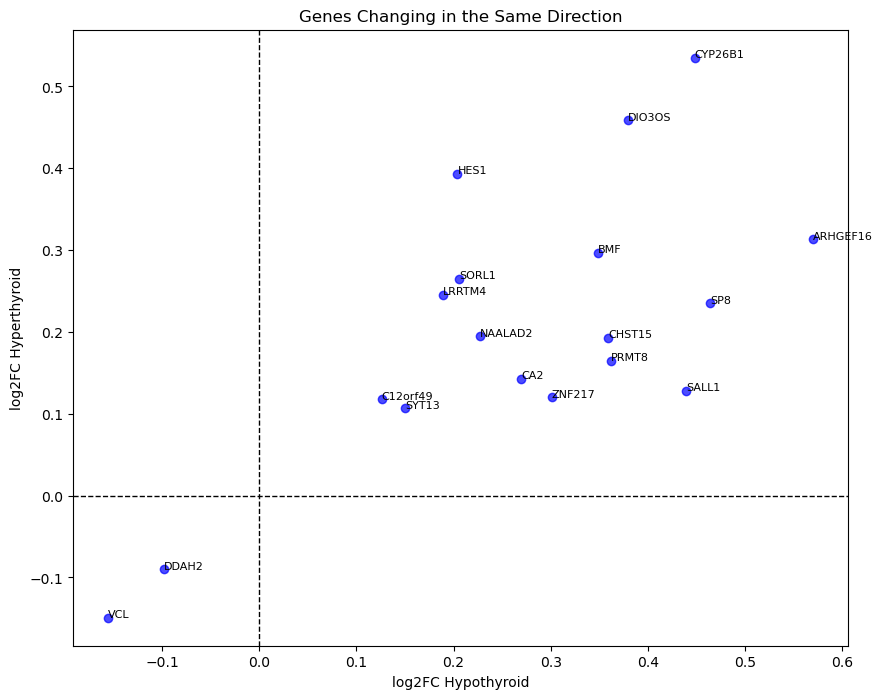

In [9]:
# Plot log2FC values for same direction genes
plt.figure(figsize=(10, 8))
plt.scatter(same_direction['log2FC_hypothyroid'], same_direction['log2FC_hyperthyroid'], color='blue', alpha=0.7)
for i, row in same_direction.iterrows():
    plt.text(row['log2FC_hypothyroid'], row['log2FC_hyperthyroid'], row['GeneSymbol'], fontsize=8)
plt.axhline(0, linestyle='--', color='black', linewidth=1)
plt.axvline(0, linestyle='--', color='black', linewidth=1)
plt.xlabel('log2FC Hypothyroid')
plt.ylabel('log2FC Hyperthyroid')
plt.title('Genes Changing in the Same Direction')
plt.savefig('../figures/main/same_direction_plot.png')
plt.show()

In [10]:
# Identify genes changing in opposite directions
opposite_direction = significant_genes[(significant_genes['log2FC_hypothyroid'] * significant_genes['log2FC_hyperthyroid']) < 0]

display(opposite_direction)

,GeneSymbol,Gene ID (Biomart)_hypo,log2FC_hypothyroid,Significance_hypo,Gene ID (Biomart)_hyper,log2FC_hyperthyroid,Significance_hyper
3909,AL513523.2,343052,0.849921,1,343052,-0.117711,1
4860,ILDR2,387597,0.309696,1,387597,-0.219113,1
16224,FGFR3,2261,0.190008,1,2261,-0.146692,1
25705,FABP7,2173,0.602497,1,2173,-0.214451,1
26073,PLAGL1,5325,-0.430776,1,5325,0.250344,1
29270,PODXL,5420,0.203925,1,5420,-0.141427,1
32679,MLLT3,4300,-0.118627,1,4300,0.198285,1
33435,KLF9,687,-0.565592,1,687,1.192252,1
39619,TSPAN18,90139,0.467218,1,90139,-0.094945,1
41896,PDGFD,80310,-0.388819,1,80310,0.245600,1


In [11]:
# Identify genes changing in opposite directions
opposite_direction_up = significant_genes[(significant_genes['log2FC_hypothyroid'] > 0) & (significant_genes['log2FC_hyperthyroid'] < 0)]
opposite_direction_down = significant_genes[(significant_genes['log2FC_hypothyroid'] < 0) & (significant_genes['log2FC_hyperthyroid'] > 0)]

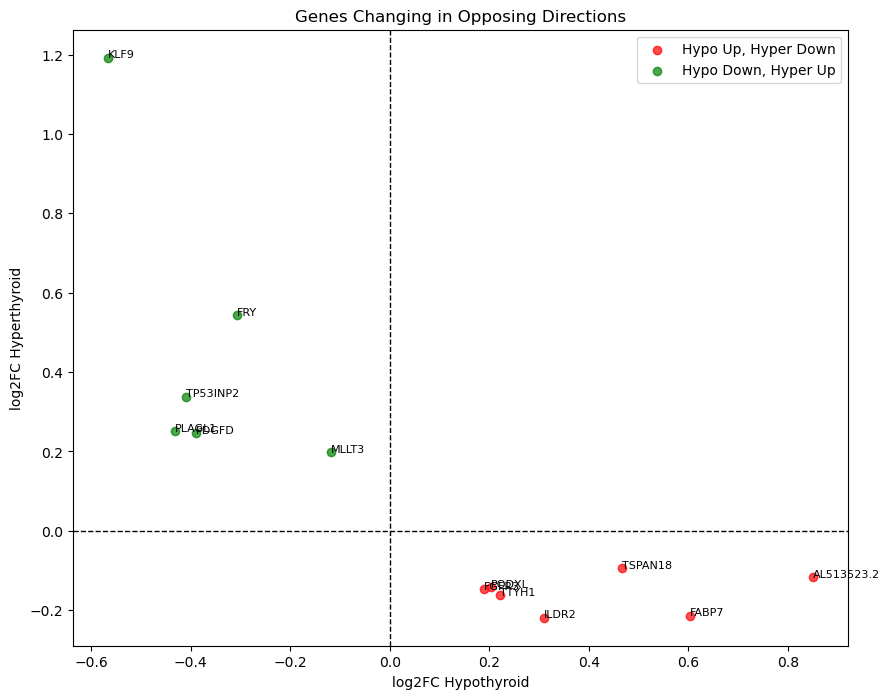

In [12]:
# Plot log2FC values for opposing directions separately
plt.figure(figsize=(10, 8))
plt.scatter(opposite_direction_up['log2FC_hypothyroid'], opposite_direction_up['log2FC_hyperthyroid'], color='red', alpha=0.7, label='Hypo Up, Hyper Down')
plt.scatter(opposite_direction_down['log2FC_hypothyroid'], opposite_direction_down['log2FC_hyperthyroid'], color='green', alpha=0.7, label='Hypo Down, Hyper Up')
for i, row in opposite_direction_up.iterrows():
    plt.text(row['log2FC_hypothyroid'], row['log2FC_hyperthyroid'], row['GeneSymbol'], fontsize=8)
for i, row in opposite_direction_down.iterrows():
    plt.text(row['log2FC_hypothyroid'], row['log2FC_hyperthyroid'], row['GeneSymbol'], fontsize=8)
plt.axhline(0, linestyle='--', color='black', linewidth=1)
plt.axvline(0, linestyle='--', color='black', linewidth=1)
plt.xlabel('log2FC Hypothyroid')
plt.ylabel('log2FC Hyperthyroid')
plt.title('Genes Changing in Opposing Directions')
plt.legend()
plt.savefig('../figures/main/opposing_direction_plot.png')
plt.show()

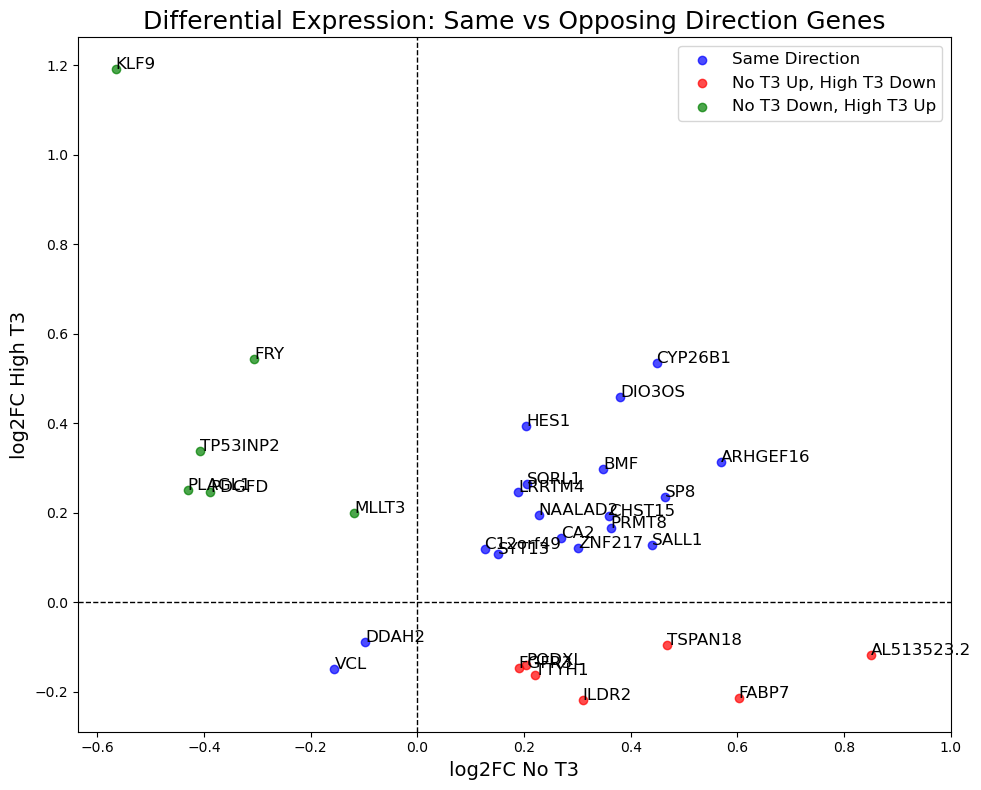

In [13]:
# Categorize gene regulation directions
same_direction = significant_genes[(significant_genes['log2FC_hypothyroid'] * significant_genes['log2FC_hyperthyroid']) > 0]
opposite_direction_up = significant_genes[(significant_genes['log2FC_hypothyroid'] > 0) & (significant_genes['log2FC_hyperthyroid'] < 0)]
opposite_direction_down = significant_genes[(significant_genes['log2FC_hypothyroid'] < 0) & (significant_genes['log2FC_hyperthyroid'] > 0)]

# Plot all in one
plt.figure(figsize=(10, 8))
plt.scatter(same_direction['log2FC_hypothyroid'], same_direction['log2FC_hyperthyroid'],
            color='blue', alpha=0.7, label='Same Direction')
plt.scatter(opposite_direction_up['log2FC_hypothyroid'], opposite_direction_up['log2FC_hyperthyroid'],
            color='red', alpha=0.7, label='No T3 Up, High T3 Down')
plt.scatter(opposite_direction_down['log2FC_hypothyroid'], opposite_direction_down['log2FC_hyperthyroid'],
            color='green', alpha=0.7, label='No T3 Down, High T3 Up')

# Add gene labels (optional; can be noisy if many points)
for df in [same_direction, opposite_direction_up, opposite_direction_down]:
    for i, row in df.iterrows():
        plt.text(row['log2FC_hypothyroid'], row['log2FC_hyperthyroid'], row['GeneSymbol'], fontsize=12)

# Reference lines
plt.axhline(0, linestyle='--', color='black', linewidth=1)
plt.axvline(0, linestyle='--', color='black', linewidth=1)

# Axis labels and title
plt.xlabel('log2FC No T3', fontsize=14)
plt.ylabel('log2FC High T3', fontsize=14)
plt.title('Differential Expression: Same vs Opposing Direction Genes', fontsize=18)
plt.xlim(None, 1.0)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('../figures/main/combined_direction_plot.png')
plt.show()


In [14]:
# Export DEG tables to CSV

# 1. All DEGs for either condition with condition column
hypo_sig = hypothyroid_df[hypothyroid_df['Significance'] == 1].copy()
hypo_sig['Condition'] = 'no T3'

hyper_sig = hyperthyroid_df[hyperthyroid_df['Significance'] == 1].copy()
hyper_sig['Condition'] = 'high T3'

all_degs = pd.concat([hypo_sig, hyper_sig], ignore_index=True)
all_degs.to_csv('../data/results/all_degs.csv', index=False)

# 2. Overlapping DEGs (significant in both conditions)
# Combine same_direction and opposite_direction (which includes both up and down)
overlapping_degs = significant_genes.copy()
overlapping_degs.to_csv('../data/results/overlapping_degs.csv', index=False)

print(f"Exported {len(all_degs)} total DEGs to '../data/results/all_degs.csv'")
print(f"Exported {len(overlapping_degs)} overlapping DEGs to '../data/results/overlapping_degs.csv'")

Exported 3058 total DEGs to '../data/results/all_degs.csv'
Exported 31 overlapping DEGs to '../data/results/overlapping_degs.csv'


In [15]:
# Export DEG tables to CSV

# 1. All DEGs for either condition with condition column
hypo_sig = hypothyroid_df[hypothyroid_df['Significance'] == 1].copy()
hypo_sig['Condition'] = 'no T3'

hyper_sig = hyperthyroid_df[hyperthyroid_df['Significance'] == 1].copy()
hyper_sig['Condition'] = 'high T3'

all_degs = pd.concat([hypo_sig, hyper_sig], ignore_index=True)
# Round log2FC to 2 decimal places and drop Significance column
all_degs['log2FC'] = all_degs['log2FC'].round(2)
all_degs = all_degs.drop(columns=['Significance'])
all_degs.to_csv('../data/results/all_degs.csv', index=False)

# 2. Overlapping DEGs (significant in both conditions)
overlapping_degs = significant_genes.copy()
# Round log2FC columns to 2 decimal places
overlapping_degs['log2FC_hypothyroid'] = overlapping_degs['log2FC_hypothyroid'].round(2)
overlapping_degs['log2FC_hyperthyroid'] = overlapping_degs['log2FC_hyperthyroid'].round(2)
# Keep only one Gene ID column and drop Significance columns
overlapping_degs = overlapping_degs.rename(columns={'Gene ID (Biomart)_hypo': 'Gene ID (Biomart)'})
overlapping_degs = overlapping_degs.drop(columns=['Gene ID (Biomart)_hyper', 'Significance_hypo', 'Significance_hyper'])
overlapping_degs.to_csv('../data/results/overlapping_degs.csv', index=False)

print(f"Exported {len(all_degs)} total DEGs to '../data/results/all_degs.csv'")
print(f"Exported {len(overlapping_degs)} overlapping DEGs to '../data/results/overlapping_degs.csv'")

Exported 3058 total DEGs to '../data/results/all_degs.csv'
Exported 31 overlapping DEGs to '../data/results/overlapping_degs.csv'
